## EV Dataset – Questions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
dataset = pd.read_csv("Electric_Vehicle_Population_Data_Cleaned.csv")
dataset.head(2)

VIN (1-10)     County     City State  Postal Code  Model Year  Make  \
0  1C4RJXN66R  Snohomish  Everett    WA      98204.0        2024  JEEP   
1  KNDJX3AEXG       King   Renton    WA      98058.0        2016   KIA   

      Model                   Electric Vehicle Type  \
0  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1      SOUL          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range            21.0   
1           Clean Alternative Fuel Vehicle Eligible            93.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  21.0       261311557   
1    31950.0                  11.0       210641315   

                  Vehicle Location  \
0  POINT (-122.2507211 47.8976713)   
1  POINT (-122.1476337 47.4438471)   

                                Electric Utility  2020 Census Tract  
0                         PUGET SOUND ENERGY INC       5.306104e+10  
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10

## Q1. How has the EV population evolved over the years?

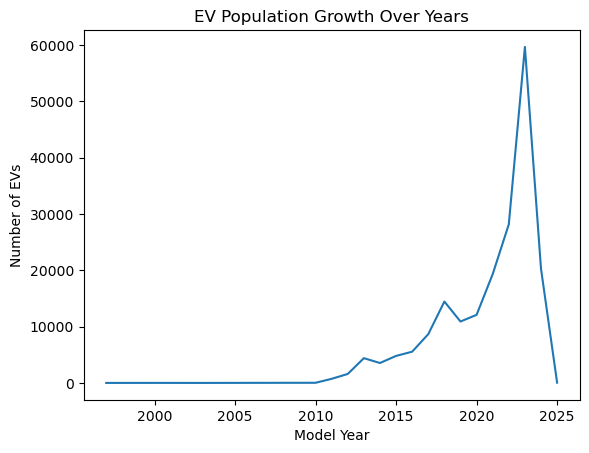

In [5]:
yearly_count = dataset['Model Year'].value_counts().sort_index()

plt.figure()
yearly_count.plot()
plt.title("EV Population Growth Over Years")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.show()

## Q2. Which EV type (BEV vs PHEV) has grown faster over time?

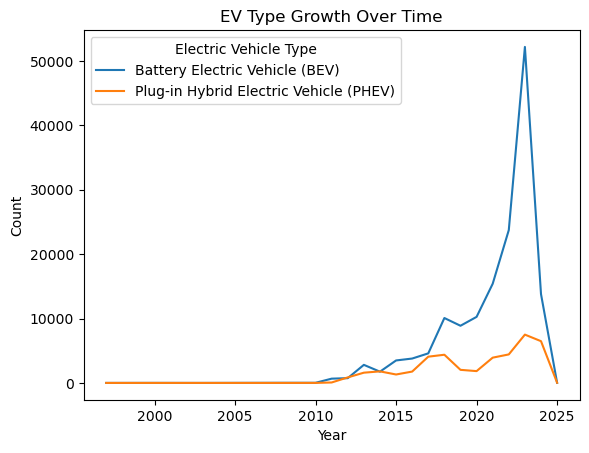

In [7]:
type_year = pd.crosstab(dataset['Model Year'], dataset['Electric Vehicle Type'])

type_year.plot()
plt.title("EV Type Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


## Q3. How has the average electric range changed over the years?

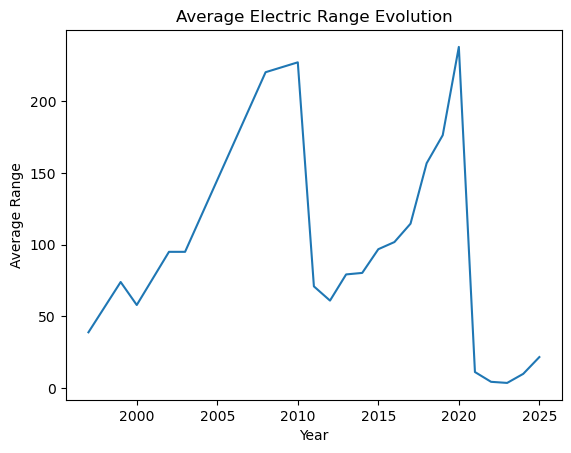

In [8]:
avg_range = dataset.groupby('Model Year')['Electric Range'].mean()

plt.figure()
avg_range.plot()
plt.title("Average Electric Range Evolution")
plt.xlabel("Year")
plt.ylabel("Average Range")
plt.show()


## Q4. Which manufacturers have contributed most to EV growth?

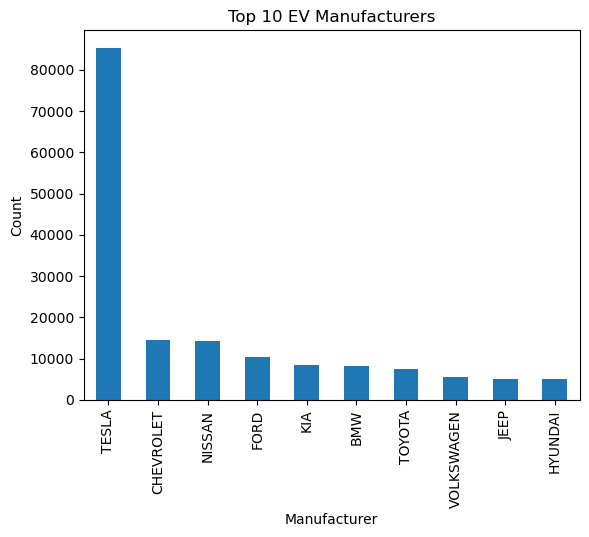

In [9]:
top_makes = dataset['Make'].value_counts().head(10)

top_makes.plot(kind='bar')
plt.title("Top 10 EV Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.show()


## Q5. How has BEV adoption changed compared to PHEV?

In [10]:
ev_type_dist = dataset['Electric Vehicle Type'].value_counts(normalize=True) * 100
print(ev_type_dist)


Electric Vehicle Type
Battery Electric Vehicle (BEV)            78.349088
Plug-in Hybrid Electric Vehicle (PHEV)    21.650912
Name: proportion, dtype: float64


## Q6. Which states have shown the highest EV adoption?

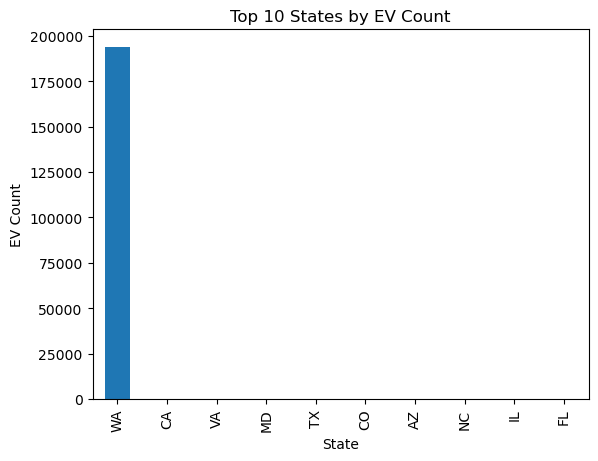

In [11]:
state_count = dataset['State'].value_counts().head(10)

state_count.plot(kind='bar')
plt.title("Top 10 States by EV Count")
plt.xlabel("State")
plt.ylabel("EV Count")
plt.show()


## Q7. Has electric range improved across different EV types?

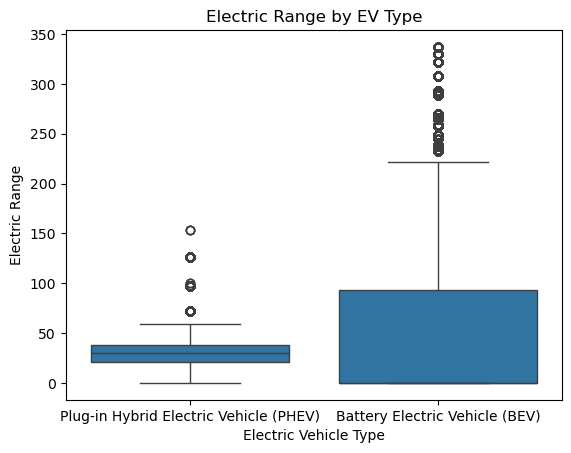

In [12]:
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=dataset)
plt.title("Electric Range by EV Type")
plt.show()


## Q8. How does CAFV eligibility vary across EV types?

In [17]:
pd.crosstab(dataset['Electric Vehicle Type'], dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])




Clean Alternative Fuel Vehicle (CAFV) Eligibility  Clean Alternative Fuel Vehicle Eligible  \
Electric Vehicle Type                                                                        
Battery Electric Vehicle (BEV)                                                       47535   
Plug-in Hybrid Electric Vehicle (PHEV)                                               21281   

Clean Alternative Fuel Vehicle (CAFV) Eligibility  Eligibility unknown as battery range has not been researched  \
Electric Vehicle Type                                                                                             
Battery Electric Vehicle (BEV)                                                                104636              
Plug-in Hybrid Electric Vehicle (PHEV)                                                             0              

Clean Alternative Fuel Vehicle (CAFV) Eligibility  Not eligible due to low battery range  
Electric Vehicle Type                                                                     
Battery Electric Vehicle (BEV)                                                         8  
Plug-in Hybrid Electric Vehicle (PHEV)                                             20772

In [19]:
sns.countplot(x='Electric Vehicle Type', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=dataset)
plt.xticks(rotation=45)
plt.show()

## Q9. Which manufacturers offer vehicles with higher electric range?

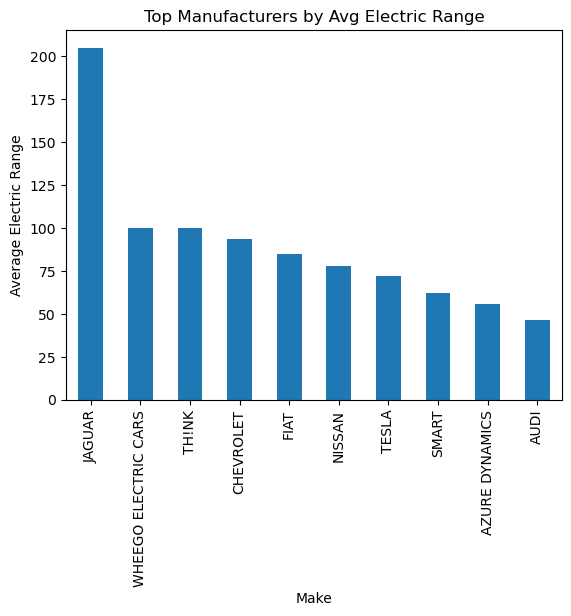

In [20]:
make_range = dataset.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)

make_range.plot(kind='bar')
plt.title("Top Manufacturers by Avg Electric Range")
plt.ylabel("Average Electric Range")
plt.show()


## Q10. Is there a trend showing increased eligibility for clean fuel incentives over time?

In [21]:
cafv_year = pd.crosstab(dataset['Model Year'], dataset['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

cafv_year.plot()
plt.title("CAFV Eligibility Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()
